<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Juan Chinchón
- Nombre de alumno 2: Stefano Pinto


### **Link de repositorio de GitHub:** `https://github.com/jchinchon/MDS7021-Laboratorio-de-Programacion-Cientifica-Labs-`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [130]:
# Libreria Core del lab.
import numpy as np
#!pip install --upgrade pandas
#!pip install xlrd
#!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
#!pip install --upgrade plotly
#!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [131]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [132]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariables es el análisis de una sola variable, en este caso se analiza cada columna del dataset por separado. El análisis multivariable es el análisis de dos o más variables, en este caso se analiza la relación entre las columnas del dataset. El análisis de datos faltantes es el análisis de los datos que no están presentes en el dataset, en este caso se analiza la cantidad de datos faltantes y la forma en que se distribuyen.


### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [133]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["unique values"] = serie.nunique()
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [134]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
unique values                      1606
Total size in memory      4203816 bytes
dtype: object

    Análisis de la serie Precio
    ----------------------------
    La variable precio no presenta datos nulos, sin embargo presenta 3 datos negativos los cuales son anomalías dada la naturaleza positiva de la variable. Además, se observa que la media es mayor a la mediana, lo que indica que la distribución de la variable es asimétrica a la derecha, esto se confirma mediante el histograma, sin embargo el skewness de la serie es negativo (-140), esto último se debe a la inclusión del mínimo negativo entorno a -50000 lo cual sesga el cálculo de la skewness (si se eliminaran estos valores anómalos, la skewness arrojaría valores positivos de acuerdo a la asimetría positiva observada). Por último, se observa que el 50% de los datos se encuentran entre 1.25 y 4.13; con valores positivos extremos hasta 25111; esto se verifica mediante la kurtosis muy elevada de 64868, que indica que la distribución muestreal posee muchos outliers (colas largas). La elevada % de duplicación de valores (99.8%) indica que son pocos los precios únicos respecto al tamaño de observaciones (elevada repetición de precios/productos). Notar que el 0.7% posee Precio 0.


In [135]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
unique values                     28816
Total size in memory      2338386 bytes
dtype: object

    Análisis de la serie Invoice
    ----------------------------
    La variable Invoice refiere a la factura que incluye los detalles de la compra, es una variable categórica. Esta presenta 28816 valores únicos, teniendo el valor más frecuente un total de 675 repeticiones, es decir, 675 detalles de compra en dicha boleta. Por último, notar que no existen datos nulos.

In [136]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
unique values                      4632
Total size in memory      1220242 bytes
dtype: object

    Análisis de la serie StockCode
    ----------------------------
    La variable Stockcode es de tipo categórica, presenta 4632 valores únicos, siendo el valor más frecuente el 85123A con 3516 repeticiones. Esta variable representa la codificación para diferentes productos.

In [137]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
unique values                                           4682
Total size in memory                           4203816 bytes
dtype: object

    Análisis de la serie Description
    ----------------------------
    La variable InvoiceDate es de tipo String, con 4682 valores únicos denotando la descripción de los productos. El valor más frecuente es WHITE HANGING HEART T-LIGHT HOLDER con 3549 repeticiones. Notar que un código de producto (4632 valores únicos) puede tener más de una descripción, por lo que no es posible identificar unívocamente un producto mediante esta variable. En primera instancia, se podría decir que no existen valores nulos, sin embargo, al realizar un conteo de las principales categorías:

```python
df_retail['Description'].value_counts()
```
    Se puede observar la categoría 'nan' que posee 2928 valores, los cuales son efectivamente nulos pero escritos en formato string.
    

In [138]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
unique values                       825
Total size in memory      4203816 bytes
dtype: object

    Análisis de la serie Quantity
    ----------------------------
    La variable Quantity, es una variable numérica entero que indica la cantidad de productos. No presenta datos nulos, sin embargo, presenta 12326 (2.35%) de datos negativos, los cuales son anomalías dada la naturaleza positiva de la variable. Además, se observa que la media(10.3) es mayor a la mediana(3), lo que indica que la distribución de la variable es asimétrica a la derecha, esto se confirma mediante el histograma y el skewness positivo. Además, se observa que el 50% de los datos se encuentran entre 1 y 10; con valores positivos extremos hasta 19152; esto se verifica mediante la kurtosis muy elevada de 6277, que indica que la distribución muestreal posee muchos outliers (colas largas). 

In [139]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
unique values                                     25296
Total size in memory                      4203816 bytes
dtype: object

    Análisis de la serie InvoiceDate
    ----------------------------
    La variable InvoiceDate es de tipo temporal (datetime de pandas). Se puede observar que la fecha mínima es el 2009-12-01 y la fecha máxima es el 2010-12-09, por lo que se puede concluir que el dataset contiene datos de 1 año. Además, se observa que el 50% de los datos se encuentran en el mes de Julio, lo que indica que la distribución de los datos es relativamente uniforme, con una leve sobrerepresentación a la derecha (segundo semestre de 2010).

In [140]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
unique values                      4383
Total size in memory      1218250 bytes
dtype: object

    Analisis de la serie Customer ID
    ----------------------------
    La variable Customer ID, es una variable de tipo categórica que refleja el ID del cliente, en este caso se poseen 4383 IDs de clientes únicos, siendo el cliente más frecuente con 5710 repeticiones. Por último, notar que existen 107927 datos nulos, lo que representa un 25.9% de los datos totales, por lo que se debe plantear una estrategia para lidiar con estos datos faltantes.

In [141]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
unique values                         40
Total size in memory       4203816 bytes
dtype: object

    Análisis de la serie Country
    ----------------------------
    La variable Country es de tipo String, y refleja el País. Existen 40 países en la base de datos, se observa que el país más frecuente es Reino Unido con aproximadamente el 92% de los registros, este fuerte desbalance se puede observar en el gráfico de barras. A partir de esto, se puede plantear agrupar las categorías restantes en una nueva categoría llamada 'Otros', para disminuir el desbalance, mejorar la performance de los modelos, y disminuir la cantidad de variables dummy a crear. Notar que no existen datos nulos.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [142]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

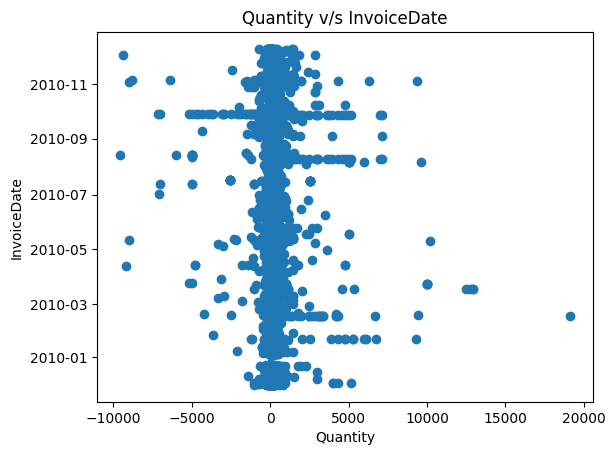

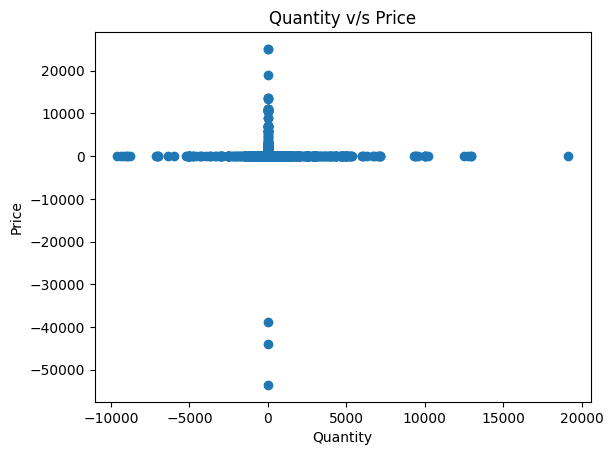

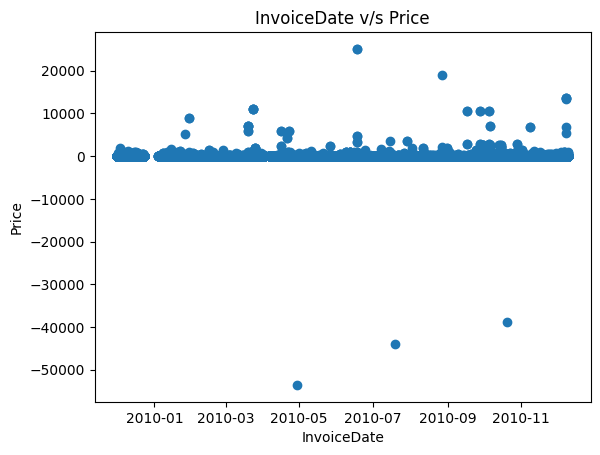

## Correlation:

## Missing Matrix:

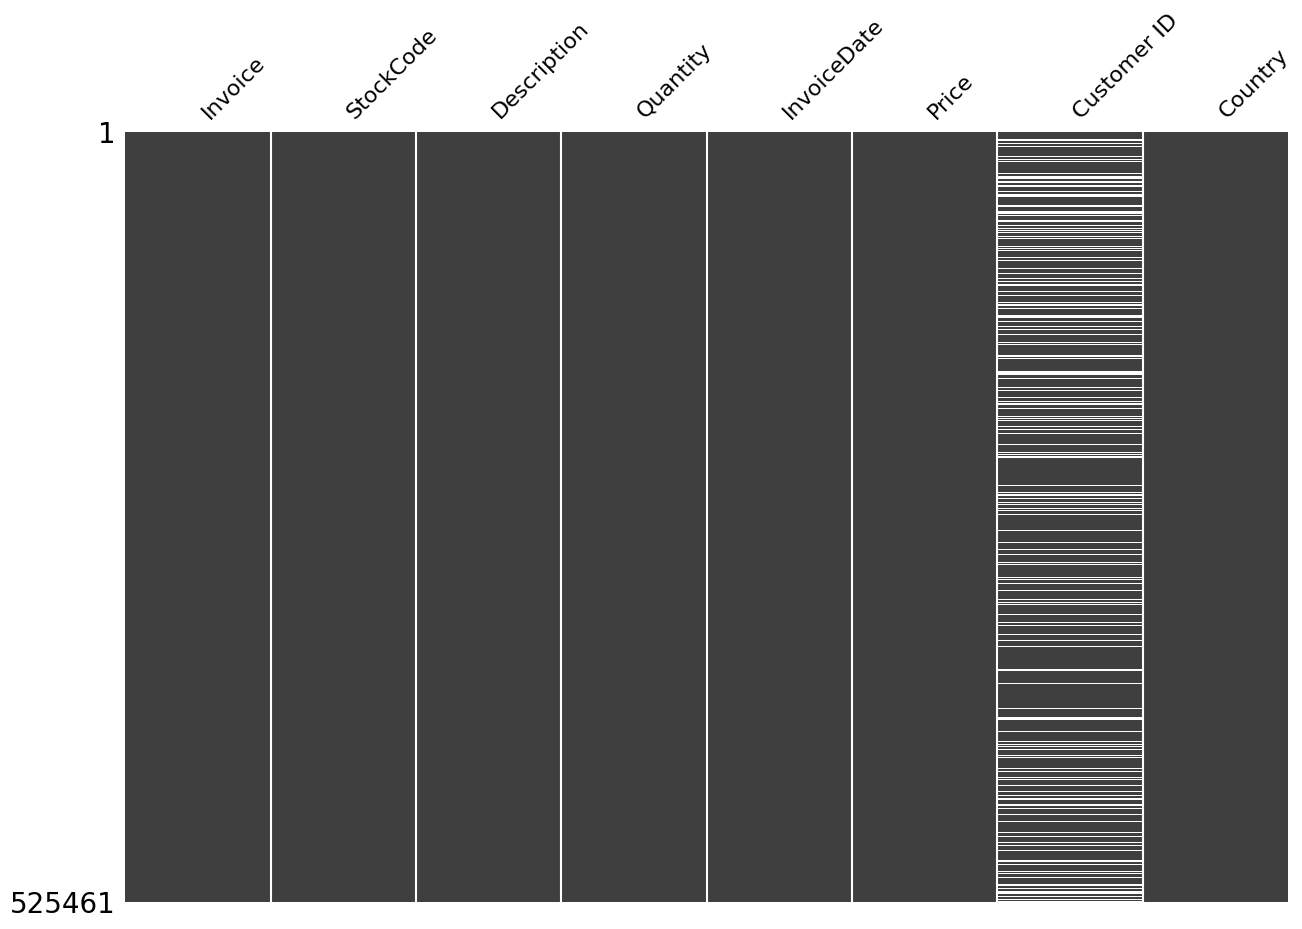

In [143]:
profile_df(df_retail)

    Analisis multivariado
    ----------------------------
    1. A partir de los scatterplot, se puede decir que:
        - Quantity vs InvoiceDate: No existe una relación clara entre estas variables, sin embargo, se puede observar que la cantidad de productos comprados por boleta se mantiene relativamente constante a lo largo del tiempo; aunque el detalle granular se dificulta dada la existencia de muchos datos outliers extremos tanto negativos como positivos. Respecto a estos datos outliers tampoco se observa una relación clara de su ocurrencia con la fecha de compra, aunque en torno a la fecha 2010-03 se observa una mayor concentración de outliers positivos, y en torno a 2010-10 una mayor concentración de outliers negativos, sin embargo lo anterior no es concluyente y podría ser un efecto azaroso.
        - Quantity vs Price: La relación es imposible de visualizar, ambas variables poseen datos outliers e inválidos (negativos), con lo cual se modifica la escala de los ejes x e y al punto de que no se puede observar la relación entre los valores válidos. Solo se puede inferior que no se presentan casos de outliers extremos en ambas variables simultáneamente, i.e. valores de cantidad muy altos con valores de precio entorno a 0 y viceversa.
        - InvoiceDate vs Price: Nuevamente los valores anómalos en la variable Precio impiden visualizar en detalle la relación entre el Precio y la fecha de transacción. Solo se puede mencionar que aparentemente los precios más altos se concentran en el segundo semestre del año 2010.
    2. A partir de la matriz de correlacion: No existe relación lineal entre los pares de variables numéricas, dadas las correlaciones cercanas a 0.
    3. A partir de la matriz de datos nulos: Se valida parte de lo obtenido en los análisis univariados, especificamente en la variable Customer ID. El gráfico aporta información visual dando evidencia de que al parecer los datos nulos reflejan falta de información aleatoria respecto al tiempo (dado que los nulos no se concentran en bloque en algún sector preferencial de la matriz), en caso de no existir ninguna relación con otras variables este sería un caso de Missing Completely At Random (MCAR).
    También mencionar que el gráfico y el análisis univariado de datos faltantes son complementarios, como se comentó anteriormente la matriz no refleja los datos faltantes en la variable Description dado que están codificados en formato String como nan, sin embargo el análisis univariado si logra detectar este suceso.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Primero verificaremos que no existen otros NaN codificados como texto en las variables categóricas, para ello se nota que tanto las variables "Invoice" como "StockCode" son codigos númericos, por ende se analizaran aquellos que no tienen números en el código.

In [144]:
#obtener los Invoice que NO TENGAN NUMEROS usando regex
df_retail.loc[df_retail['Invoice'].astype(str).str.contains('^[^0-9]+$', regex=True), 'Invoice']

Series([], Name: Invoice, dtype: category
Categories (28816, object): [489434, 489435, 489436, 489437, ..., 'C538122', 'C538123', 'C538124', 'C538164'])

In [145]:
#obtener los Stockcode que NO TENGAN NUMEROS usando regex
df_retail.loc[df_retail['StockCode'].astype(str).str.contains('^[^0-9]+$', regex=True), 'StockCode'].unique()

['POST', 'D', 'DOT', 'M', 'BANK CHARGES', ..., 'DCGSSBOY', 'DCGSLGIRL', 'S', 'B', 'AMAZONFEE']
Length: 16
Categories (4632, object): [10002, 10080, 10109, 10120, ..., 'gift_0001_70', 'gift_0001_80', 'gift_0001_90', 'm']

In [146]:
#obtener los Stockcode que NO TENGAN NUMEROS usando regex
df_retail.loc[~df_retail['Customer ID'].astype(str).str.contains('[\d+\.0|NaN]', regex=True), 'Customer ID']

Series([], Name: Customer ID, dtype: category
Categories (4383, float64): [12346.0, 12347.0, 12348.0, 12349.0, ..., 18284.0, 18285.0, 18286.0, 18287.0])

No se observa la presencia de NaN en las variables categóricas, solo en la variable String Description:

In [147]:
#obtener los Stockcode que NO TENGAN NUMEROS usando regex
df_retail['Description'].value_counts().head(3)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
nan                                   2928
REGENCY CAKESTAND 3 TIER              2212
Name: count, dtype: int64

La lógica de limpieza será la siguiente:
- Codificar como nulos todos los valores inválidos para la variable Quantity (negativos), Price (negativos y 0) y Description ("nan").
- Dejar como valores inválidos los outliers de Price y Quantity, los outliers se determinan como los valores que superan el percentil 99 de la distribución de cada variable (esto dado que se observa que las variables no se distribuyen de manera normal, por lo que se prefiere no utilizar la desviación estándar para determinar los outliers).
- Dejar como opcional la eliminación de todos los registros con datos nulos. Esto debido a que la eliminación de los registros dependerá del objetivo del análisis, por ejemplo, puede ser que el CustomerID sea irrelevante en el análisis, eliminar estos registro es equivalente a eliminar un 20% de la base de dato, lo cual impactaría negativamente si es que solo se está interesado en analizar la variable Quantity y Price.
- En el caso actual se esta interesado posteriormente en realizar un análisis de ingresos, con lo cual son relevantes las variables Quantity y Price y CustomerID, por lo que se optará por eliminar los registros con datos nulos de estas variables solamente.


In [148]:
def limpiar_dataset(df, dropna = False):
    #codificar los datos negativos e iguales a 0 en Quantity y Price como NaN (invalidos)
    df.loc[df['Quantity'] <= 0, 'Quantity'] = np.nan
    df.loc[df['Price'] <= 0, 'Price'] = np.nan
    #considerar como outliers los valores que superen el cuantil 0.99
    df.loc[df['Quantity'] > df['Quantity'].quantile(0.99), 'Quantity'] = np.nan
    df.loc[df['Price'] > df['Price'].quantile(0.99), 'Price'] = np.nan
    #filas cuyo Description sea nan canbiar por NaN
    df.loc[df['Description']=='nan', 'Description'] = np.nan
    if dropna:
        df = df.dropna()
    return df
df_retail_limpio = limpiar_dataset(df_retail, dropna=False)
df_retail_limpio = df_retail_limpio.dropna(subset=['Quantity', 'Price'])

In [149]:
profile_serie(df_retail_limpio['Quantity'])

## Quantity Profile

Type                            float64
Number of observations         502360.0
Mean                           8.109493
Std                           13.286348
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                               120.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          24.054436
Skew                           4.297141
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   502355
Duplicate rows (%)              100.0 %
unique values                       117
Total size in memory      8037760 bytes
dtype: object

In [150]:
profile_serie(df_retail_limpio['Price'])

## Price Profile

Type                            float64
Number of observations         502360.0
Mean                           3.243533
Std                            3.046251
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                               19.95
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                           4.811329
Skew                           2.036861
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   502266
Duplicate rows (%)              99.98 %
unique values                       409
Total size in memory      8037760 bytes
dtype: object

## Bivariant Analysis:

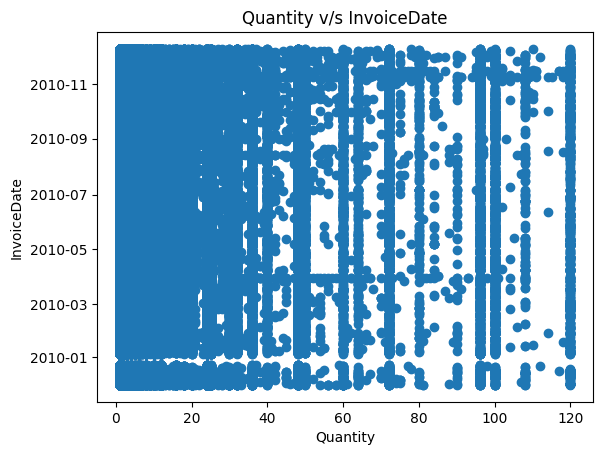

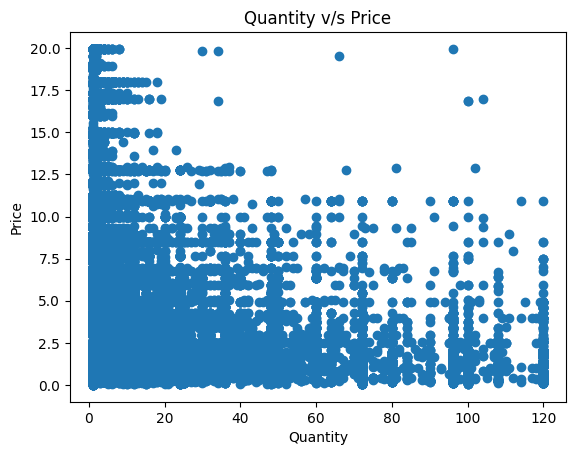

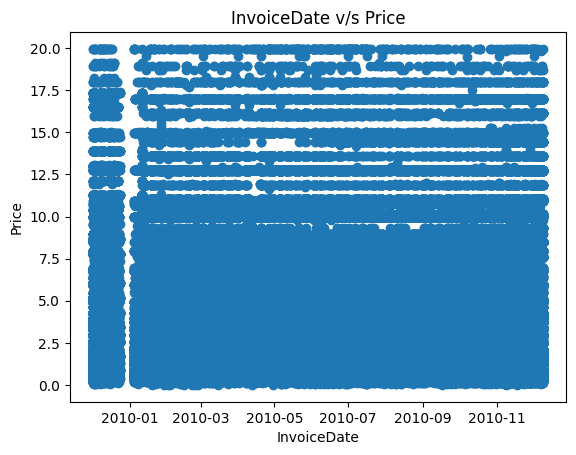

## Correlation:

## Missing Matrix:

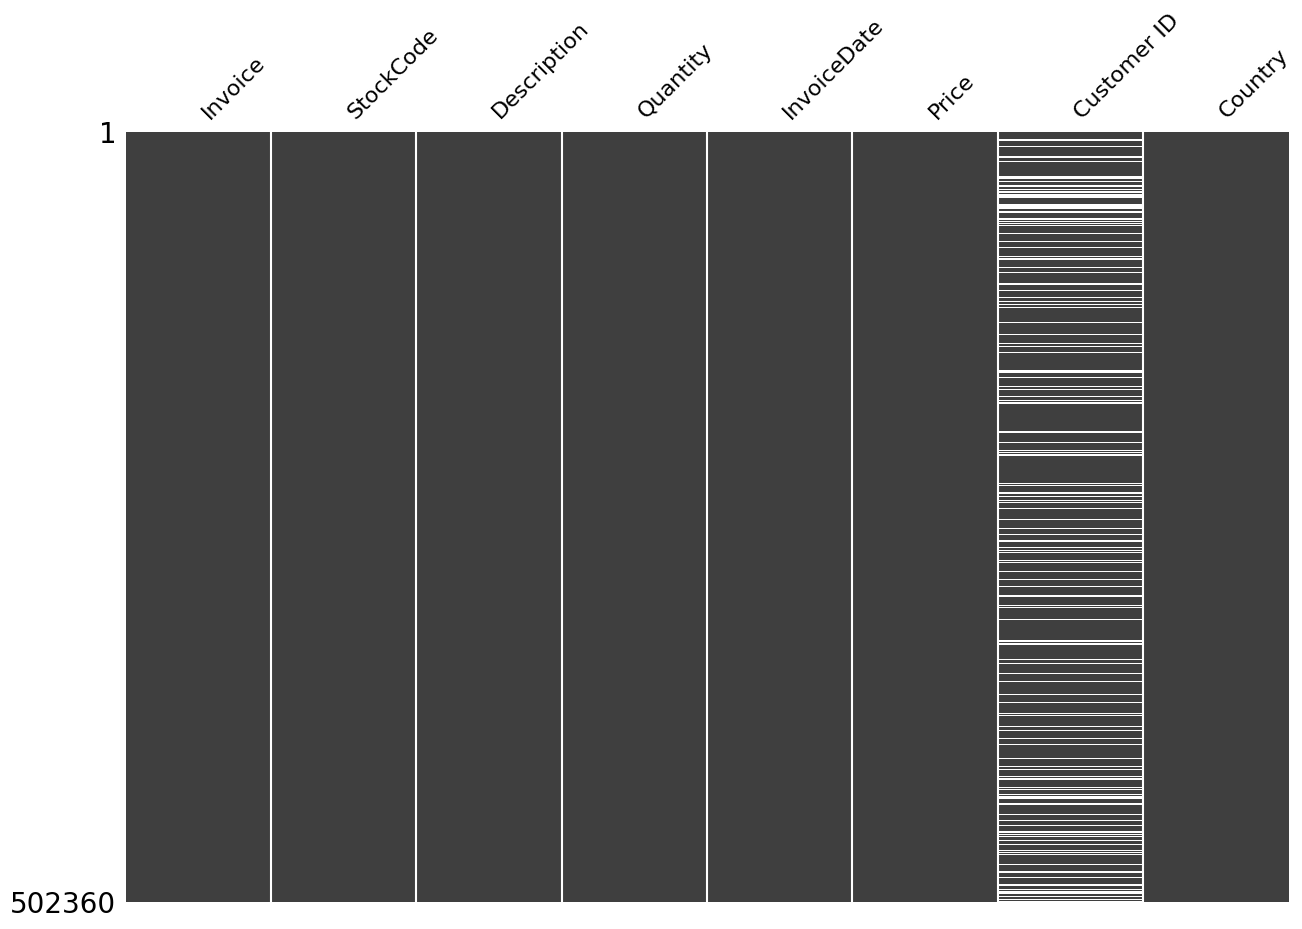

In [151]:
profile_df(df_retail_limpio)

    El análisis con el dataset limpio revela que:
    
    1. A partir de los scatterplot, se puede decir que:
        - Quantity vs InvoiceDate: Se observa una mayor densidad de puntos hacia el final del perfil de tiempo, es decir cercano a Noviembre de 2010 habrían más ventas. Sin embargo, a grandes rasgos, las cantidades se mantienen constantes en el tiempo.
        - Quantity vs Price: La relación es más clara en este caso. Se observa que a mayor cantidad de productos comprados, menor es el precio unitario de cada producto, revelando una relación inversa, sin embargo, se observa además que la relación posee un componente no lineal. Esto se podría explicar por el hecho de que a mayor cantidad de productos comprados, mayor es el descuento que se puede negociar con el proveedor, por lo que el precio unitario disminuye, pero no estrictamente de manera lineal.
        - InvoiceDate vs Price: No se observa relación entre las variables.
    2. A partir de la matriz de correlacion: Se verifica la relación inversa con la correlación de -0.25
    3. A partir de la matriz de datos nulos: Se destaca que los registros con descripciones de producto NaN estaban relacionados a registros también inválidos en Quantity y/o Price.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [152]:
df_top30=df_retail.copy()
df_top30['Ganancia']=df_top30['Quantity']*df_top30['Price']
df_top30=df_top30.groupby('Description').agg({
    'Description' : 'first',
    'Quantity':'sum',
    'Ganancia':'sum'
    })
df_top30['Ingreso/Cantidad']=df_top30['Ganancia']/df_top30['Quantity']

df_ganancia=df_top30.sort_values(by='Ganancia',ascending=False).head(30)
df_quantity=df_top30.sort_values(by='Quantity',ascending=False).head(30)
df_ingcant=df_top30.sort_values(by='Ingreso/Cantidad',ascending=False).head(30)

In [153]:
figura = px.bar(df_ganancia, x='Description', y='Ganancia', title='Gráfico top 30 ganancia')

figura.show()  

In [154]:
figura = px.bar(df_quantity, x='Description', y='Quantity', title='Gráfico top 30 cantidad')

figura.show()  

In [155]:
figura = px.bar(df_ingcant, x='Description', y='Ingreso/Cantidad', title='Gráfico top 30 ingresos / cantidad')

figura.show()  

In [156]:
figura = px.bar(df_ganancia, x='Description', y='Ingreso/Cantidad', title='Gráfico top 30 ingreso/cantidad evaluado en el top 30 de ganancias')
figura.show()  

    Para este caso se aprecia que algunos productos estan en ambos top, destacando el producto 'WHITE HANGING HEART T-LIGHT HOLDER', sin embargo, la mayoría de los productos no se encuentran en el top. Por lo tanto, no es posible afirmar que los productos más vendidos son los que generan más ganancia.
    Esto se puede ver más claramente en el hecho de que el artículo más vendido (+Quantity) es 'WHITE HANGING HEART T-LIGHT HOLDER', y sin embargo, el artículo que genera más ganancias es 'REGENCY CAKESTAND', e incluso el artículo que es más caro unitariamente es 'SWEETHEART CREAM STEEL FOLDIN BENCH', por lo que se concluye que ningún artículo es el mejor en todos los aspectos.	

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

Respuesta: Se entenderá ventas diarias como el número de boletas emitidas por el negocio en un día. De igual forma se graficará las ganancias diarias, entendiendo esto como la suma de los precios por los productos vendidos en un día.

In [157]:
def plot_ventas(dataframe):
  df_ventas=dataframe.copy()
  #convertir a fecha
  df_ventas['InvoiceDate'] = df_ventas['InvoiceDate'].dt.date
  #calcular la ganancia por fila
  df_ventas['Ganancia']=df_ventas['Quantity']*df_ventas['Price']

  #agrupar por invoice(factura) y sumar cantidad y ganancia    
  df_ventas=df_ventas.groupby('Invoice').agg({
    'Invoice':'first',
    'InvoiceDate' : 'first',
    'Quantity':'sum',
    'Ganancia':'sum'
    })

  #agrupar por fecha y sumar cantidad y ganancia
  df_dia=df_ventas.groupby('InvoiceDate').agg({
    'Invoice':'count',
    'InvoiceDate' : 'first',
    'Quantity':'sum',
    'Ganancia':'sum'
  })
  

  figura = px.line(df_dia, x='InvoiceDate', y='Invoice', title='Gráfico de ventas por día')
  figura.show()  

  figura = px.line(df_dia, x='InvoiceDate', y='Ganancia', title='Gráfico de ganancias por día')
  figura.show()  

In [158]:
plot_ventas(df_retail)

    Se puede apreciar principalmente que existen grandes variaciones dia a dia, días con alta venta y al día siguiente con baja venta, es decir existe una elevada varianza de los datos, y poca correlación con días anteriores.

    Además existen varios peaks a lo largo del año, existe un periodo en la época navideña donde no se encuentran datos y tambien se aprecia un aumento general en las ventas despues de septiembre del año 2010.

Se compara con la base de datos limpia: el resultado es principalmente en la disminución de la varianza. Esto se debe a la eliminación de datos anómalos, i.e. precios y cantidades negativas que afectan el resultado diario

In [159]:
plot_ventas(df_retail_limpio)

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>